## Code for Evaluating the Performance of Terapixel rendering in Cloud (Super)computing

### Introduction:

This `.ipynb` file is to support the report on the Terapixel image rendering. This Jupyter Notebook file is to provide the back end or the technical (code) aspect of the analysis. Providing the data analysis code to stakeholders can be beneficial in several ways:
* Transparency and reproducibility
* Collaboration
* Maintenance and scalability
* Reusability
* Better understanding of data

Each code chunk has a comment above for easy understanding.

### Importing Libraries

The required data handling libraries like `pandas`, `numpy` and visualisation libraries like `matplotlib` and `seaborn` are imported. Further the `warning` library is imported to avoid showing warnings in output.

In [38]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Datasets

In [39]:
# Importing Datasets into dataframes
df_ap = pd.read_csv("C:/Users/Jashwant Anandan/CSC8634/data/application-checkpoints.csv")
df_gpu = pd.read_csv("C:/Users/Jashwant Anandan/CSC8634/data/gpu.csv")
df_task = pd.read_csv("C:/Users/Jashwant Anandan/CSC8634/data/task-x-y.csv")

As mentioned in the report `df_ap`, `df_gpu` and `df_task` are the three uncleaned raw dataframes.

### Basic Analysis:

Basic Analysis like checking the *dimensions* and *datatype* of the dataframes and also checking for *null* rows in the data.

In [40]:
# Display the dimensions of the dataframes
print("Dimenion of application-checkpoint.csv : ", df_ap.shape)
print("Dimenion of gpu.csv : ", df_gpu.shape)
print("Dimenion of task-x-y.csv : ", df_task.shape)

Dimenion of application-checkpoint.csv :  (660400, 6)
Dimenion of gpu.csv :  (1543681, 8)
Dimenion of task-x-y.csv :  (65793, 5)


In [41]:
# Display the columns of each dataframes with datatypes
print("---application-checkpoints.csv---")
print(df_ap.dtypes)
print("-------------gpu.csv-------------")
print(df_gpu.dtypes)
print("-----------task-x-y.csv----------")
print(df_task.dtypes)

---application-checkpoints.csv---
timestamp    object
hostname     object
eventName    object
eventType    object
jobId        object
taskId       object
dtype: object
-------------gpu.csv-------------
timestamp          object
hostname           object
gpuSerial           int64
gpuUUID            object
powerDrawWatt     float64
gpuTempC            int64
gpuUtilPerc         int64
gpuMemUtilPerc      int64
dtype: object
-----------task-x-y.csv----------
taskId    object
jobId     object
x          int64
y          int64
level      int64
dtype: object


The code chunks above indicates the uncleaned dataframes dimensions, this type of dataframe is called *tall* set. Tall datasets are one with a large number of rows compared to the number of its columns.

#### Data Quality Report

In [42]:
# Check for null values in the dataframes.
print("---application-checkpoints.csv---")
print(df_ap.isnull().sum())
print("-------------gpu.csv-------------")
print(df_gpu.isnull().sum())
print("-----------task-x-y.csv----------")
print(df_task.isnull().sum())

---application-checkpoints.csv---
timestamp    0
hostname     0
eventName    0
eventType    0
jobId        0
taskId       0
dtype: int64
-------------gpu.csv-------------
timestamp         0
hostname          0
gpuSerial         0
gpuUUID           0
powerDrawWatt     0
gpuTempC          0
gpuUtilPerc       0
gpuMemUtilPerc    0
dtype: int64
-----------task-x-y.csv----------
taskId    0
jobId     0
x         0
y         0
level     0
dtype: int64


It is evident that here is *no null values* in any of the columns in all of the three dataframes, this is very good for the as null values may impede the analysis process.

### Data Preperation

In [43]:
# Display the first 3 rows
df_ap.head(3)

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [44]:
# Change the datatype of a column
df_ap["timestamp"] = df_ap["timestamp"].apply(lambda x: pd.Timestamp(x))

# Display the datatype of each column
df_ap.dtypes

timestamp    datetime64[ns, UTC]
hostname                  object
eventName                 object
eventType                 object
jobId                     object
taskId                    object
dtype: object

The `timestamp` column from `df_ap` dataframe is changed into datetime datatype for easy performance or run time calculations. 

In [45]:
# Display the first 3 rows
df_gpu.head(3)

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44


In [46]:
# Change the datatype
df_gpu["timestamp"] = df_gpu["timestamp"].apply(lambda x: pd.Timestamp(x))
# Change the datatype
df_gpu["gpuSerial"] = df_gpu["gpuSerial"].apply(lambda x: str(x))

# Display the datatype of each column
df_gpu.dtypes

timestamp         datetime64[ns, UTC]
hostname                       object
gpuSerial                      object
gpuUUID                        object
powerDrawWatt                 float64
gpuTempC                        int64
gpuUtilPerc                     int64
gpuMemUtilPerc                  int64
dtype: object

Similar to `df_ap`, the `df_gpu` dataframes's timestamp column is also changed to datetime dataype. Additionally, the `gpuSerial` column is changed to string because it represents the id of a particular GPU.

In [47]:
# Create a new dataframe by filtering
df_ap_start = df_ap.loc[df_ap["eventType"] == "START"]

# Create a new dataframe by filtering
df_ap_stop = df_ap.loc[df_ap["eventType"] == "STOP"]

# Merge(Join) dataframes on multiple columns
df_start_stop = pd.merge(df_ap_start, df_ap_stop,  how='left', on=['hostname','eventName','jobId','taskId'],
                         suffixes=('_start', '_stop'))

# # Display the first 3 rows
df_start_stop.head(3)

,timestamp_start,hostname,eventName,eventType_start,jobId,taskId,timestamp_stop,eventType_stop
0,2018-11-08 07:42:29.842000+00:00,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08 07:42:29.845000+00:00,STOP
1,2018-11-08 07:42:29.845000+00:00,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08 07:43:10.965000+00:00,STOP
2,2018-11-08 07:43:56.239000+00:00,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71,2018-11-08 07:43:57.245000+00:00,STOP


Two new dataframes `df_ap_start` and `df_ap_stop` are formed by filtering the `eventType` column as *STOP* and *START*. Finally, it is merged column wise into `df_start_stop` to get two differet `timestamp` column

In [48]:
# Create a new column from other two columns 
df_start_stop["performance_time"] = df_start_stop["timestamp_stop"] - df_start_stop["timestamp_start"]

# Display datatype of each column
df_start_stop.dtypes

timestamp_start     datetime64[ns, UTC]
hostname                         object
eventName                        object
eventType_start                  object
jobId                            object
taskId                           object
timestamp_stop      datetime64[ns, UTC]
eventType_stop                   object
performance_time        timedelta64[ns]
dtype: object

The very important calculation of `performance_time` or *runtime* is calculated and formed as a new column in the `df_start_stop` dataframe.

In [49]:
# Display first 2 rows
df_start_stop.head(2)

,timestamp_start,hostname,eventName,eventType_start,jobId,taskId,timestamp_stop,eventType_stop,performance_time
0,2018-11-08 07:42:29.842000+00:00,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08 07:42:29.845000+00:00,STOP,0 days 00:00:00.003000
1,2018-11-08 07:42:29.845000+00:00,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08 07:43:10.965000+00:00,STOP,0 days 00:00:41.120000


In [50]:
# Change the datatype 
df_start_stop["performance_time"] = df_start_stop["performance_time"].astype(str)

# Split a column and get a particular value
df_start_stop["performance_time"] = df_start_stop["performance_time"].apply(lambda x: x.split(":")[2])

# Change the datatype
df_start_stop["performance_time"] = df_start_stop["performance_time"].astype('float32')

# Display first 2 rows
df_start_stop.head(2)

,timestamp_start,hostname,eventName,eventType_start,jobId,taskId,timestamp_stop,eventType_stop,performance_time
0,2018-11-08 07:42:29.842000+00:00,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08 07:42:29.845000+00:00,STOP,0.003000
1,2018-11-08 07:42:29.845000+00:00,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08 07:43:10.965000+00:00,STOP,41.119999


Now as the `perfomance_time` column is formed, the second time is taken from changing it to string datatype and using `.split`. Now the same column is turned to `float32` datatype to do calculations. 

In [51]:
# Sort the dataframe based on a column
df_start_stop.sort_values(by=["hostname"], inplace=True)

# Display first 5 rows
df_start_stop.head(5)

,timestamp_start,hostname,eventName,eventType_start,jobId,taskId,timestamp_stop,eventType_stop,performance_time
129738,2018-11-08 08:27:00.229000+00:00,04dc4e9647154250beeee51b866b0715000000,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,936079ee-9a81-49c2-b93b-32d130453237,2018-11-08 08:27:43.733000+00:00,STOP,43.504002
53391,2018-11-08 08:17:34.351000+00:00,04dc4e9647154250beeee51b866b0715000000,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,9c6c5377-3bd6-4d34-b7cb-bae40dabb524,2018-11-08 08:17:35.325000+00:00,STOP,0.974000
330144,2018-11-08 08:27:46.979000+00:00,04dc4e9647154250beeee51b866b0715000000,TotalRender,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,2032171a-2a01-4f70-a435-dfe50d336cf0,2018-11-08 08:28:33.195000+00:00,STOP,46.216000
247625,2018-11-08 08:16:43.888000+00:00,04dc4e9647154250beeee51b866b0715000000,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,a164499b-4bb8-42b7-9dc0-cf049b62731e,2018-11-08 08:16:44.996000+00:00,STOP,1.108000
149549,2018-11-08 07:48:51.465000+00:00,04dc4e9647154250beeee51b866b0715000000,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,2daaf846-7d17-4c03-9601-90cfbef3fd4a,2018-11-08 07:49:33.243000+00:00,STOP,41.778000


In [52]:
# Display datatype of each column
df_start_stop.dtypes

timestamp_start     datetime64[ns, UTC]
hostname                         object
eventName                        object
eventType_start                  object
jobId                            object
taskId                           object
timestamp_stop      datetime64[ns, UTC]
eventType_stop                   object
performance_time                float32
dtype: object

In [53]:
# Filter the dataframe
df_host_perf = df_start_stop.loc[df_start_stop["eventName"] == "TotalRender"]

# Group the dataframe and average the other numerical columns
df_host_perf = df_host_perf.groupby(by=["hostname"], as_index=False).mean()

# Display the last 3 rows
df_host_perf.tail(5)

,hostname,performance_time
1019,e7adc42d28814e518e9601ac2329c513000019,44.228394
1020,e7adc42d28814e518e9601ac2329c51300001A,39.389957
1021,e7adc42d28814e518e9601ac2329c51300001B,43.256607
1022,e7adc42d28814e518e9601ac2329c51300001C,43.969803
1023,e7adc42d28814e518e9601ac2329c51300001D,44.705101


Filtering the `df_start_stop` to get only the performance time of the `TotalRender` process and then grouping it by `hostname` to get the `df_host_perf` dataframe.

In [54]:
# Dispaly all column names
df_gpu.columns

Index(['timestamp', 'hostname', 'gpuSerial', 'gpuUUID', 'powerDrawWatt',
       'gpuTempC', 'gpuUtilPerc', 'gpuMemUtilPerc'],
      dtype='object')

In [55]:
# Group the dataframe and average the other numerical columns
df_gpu_perf = df_gpu[["hostname","gpuUUID","gpuSerial","powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"]].groupby(by=["hostname","gpuUUID","gpuSerial"], as_index=False).mean()

# Display the first 3 rows
df_gpu_perf.head(3)

,hostname,gpuUUID,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,04dc4e9647154250beeee51b866b0715000000,GPU-a1119ee9-9cd1-919f-a479-b902142c717d,323217056165,95.868947,43.525333,63.602667,35.876000
1,04dc4e9647154250beeee51b866b0715000001,GPU-3dc1601f-0e52-2e31-6b8d-8537d356b84d,323617042956,91.813693,40.992000,64.630000,35.510000
2,04dc4e9647154250beeee51b866b0715000002,GPU-e2deaca4-3041-9bbd-b6ac-6d36e09ab116,323617021222,82.537798,38.048193,61.548862,30.505355


Similar to `df_host_perf` the `df_gpu` is also grouped based on multiple columns, `hostname`,`gpuUUID`,`gpuSerial`.

In [56]:
# Merge (Join) two dataframes
df_total_perf = pd.merge(df_host_perf, df_gpu_perf, on="hostname")

# Display first 5 rows
df_total_perf.head(5)

,hostname,performance_time,gpuUUID,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,04dc4e9647154250beeee51b866b0715000000,44.350327,GPU-a1119ee9-9cd1-919f-a479-b902142c717d,323217056165,95.868947,43.525333,63.602667,35.876000
1,04dc4e9647154250beeee51b866b0715000001,43.698051,GPU-3dc1601f-0e52-2e31-6b8d-8537d356b84d,323617042956,91.813693,40.992000,64.630000,35.510000
2,04dc4e9647154250beeee51b866b0715000002,40.275417,GPU-e2deaca4-3041-9bbd-b6ac-6d36e09ab116,323617021222,82.537798,38.048193,61.548862,30.505355
3,04dc4e9647154250beeee51b866b0715000003,39.913895,GPU-173a16e7-07e7-3677-b499-9e20353f81a3,323617021168,86.558581,41.576282,60.127249,29.832778
4,04dc4e9647154250beeee51b866b0715000004,43.969166,GPU-c1bb7aec-1afc-3226-db53-58f077365bea,323217056664,94.292392,39.742838,64.545636,35.549634


Finally both `df_host_perf` and `df_gpu_perf` are merged to form the very important dataframe of `df_total_perf`.

In [57]:
# Merge two dataframes on multiple columns
df_task_new = pd.merge(df_task, df_start_stop.loc[df_start_stop["eventName"]=="TotalRender"],
                       how="inner", on=["jobId","taskId"], suffixes=("_task","_ap"))

# Filter and create a new dataframe
df_x_y_12 = df_task_new[["performance_time","x","y"]].loc[df_task_new["level"]==12]

# Group and aggregate the dataframe
df_x_y_12 = df_x_y_12.groupby(by=["x","y"], as_index=False).mean()
df_x_y_12.head(5)

,x,y,performance_time
0,0,0,24.627001
1,0,1,43.248001
2,0,2,24.413000
3,0,3,44.470001
4,0,4,24.059999


Now another important dataframe `df_x_y_12` is formed by merging `df_task` and `TotalRender` filtered version of the `df_start_stop` dataframe. This merging is done column wise by `jobId` and `taskId`. Merging is done using columns that are common in both the involved dataframes.

In [58]:
# Create a new dataframe using specific columns from other dataframe
df_level_perf = df_task_new[["level","performance_time"]]

# Group and aggregate the dataframe
df_level_perf = df_level_perf.groupby(by=["level"], as_index=False).mean()

# Display the dataframe
df_level_perf

,level,performance_time
0,4,52.181999
1,8,34.143883
2,12,41.793999


Finally, `df_level_perf` dataframe is created by taking only the `level` and `performance_time` columns from `df_task_new`. Then, grouping it based on the `level` to get performance time of each level.

After cleaning the data  finally four important and cleaned dataframes are derived `df_start_stop`, `df_total_perf`,`df_x_y_12` and `df_level_perf`.This Data preparation part is one of the most important and core part of an EDA process, raw uncleaned data is munged and turned into clean usable data. This is the process where a Data Scientist or a Data Analyst spends half of their time. 

### Data Analysis:

In [59]:
# Group the dataframe
df_eventName = df_start_stop[["eventName","performance_time"]].groupby(by="eventName", as_index=False).mean()

# Sort the dataframe
df_eventName.sort_values(by="performance_time", ascending=False, inplace=True)

# Reset dataframe index to default
df_eventName = df_eventName.reset_index(drop=True)

# Display the dataframe
df_eventName

,eventName,performance_time
0,TotalRender,41.764030
1,Render,41.072792
2,Uploading,1.393523
3,Tiling,0.973204
4,Saving Config,0.002476


`df_eventName` is formed by grouping `df_start_stop` based on the `eventName` column name, then, the same is sorted based on `performance_time` in descending order to see the runtime of various tasks.

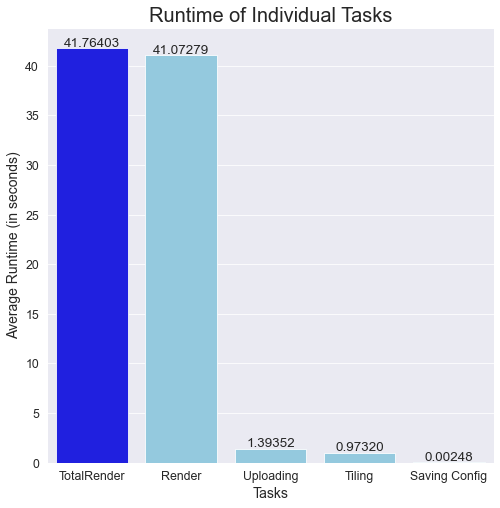

In [60]:
# Plot a barplot using seaborn library
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.4)
plt.subplots(figsize=(8,8))
palette = {i: "blue" if i == "TotalRender" else 'skyblue' for i in df_eventName["eventName"]}
event_plot = sns.barplot(data=df_eventName, x="eventName", y="performance_time", palette=palette)

# Add respective value on each bar
for g in event_plot.patches:
    event_plot.annotate(format(g.get_height(), '.5f'),
                       (g.get_x() + g.get_width() / 2., g.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 5),
                       textcoords = 'offset points')

# Change characteristics of the visual
plt.title("Runtime of Individual Tasks", size=20)
plt.xlabel("Tasks", size = 14)
plt.ylabel("Average Runtime (in seconds)", size = 14)
plt.show()

`df_eventName` is used to plot a barplot using the *seaborn* library. This Barplot compares the main `TotalRender` process and its respective subprocesses.

<Figure size 576x576 with 0 Axes>

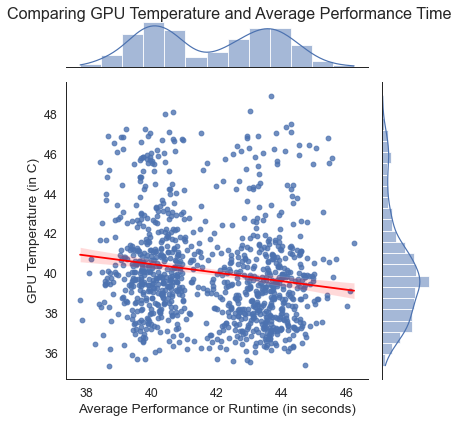

In [61]:
# Plot a Joint Plot
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.set_context('paper', font_scale=1.4)
p = sns.jointplot(x='performance_time', y='gpuTempC', data=df_total_perf, kind='reg',joint_kws={'line_kws':{'color':'red'}})
p.fig.suptitle("Comparing GPU Temperature and Average Performance Time")
p.ax_joint.set_xlabel('Average Performance or Runtime (in seconds)')
p.ax_joint.set_ylabel('GPU Temperature (in C)')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

A jointplot showing Average Runtime against GPU temperature is displayed using the `df_total_perf` is plotted. The relationship is not linear but clusters are noticable

Text(0.5, 1.01, 'Comparing all GPU Metrics')

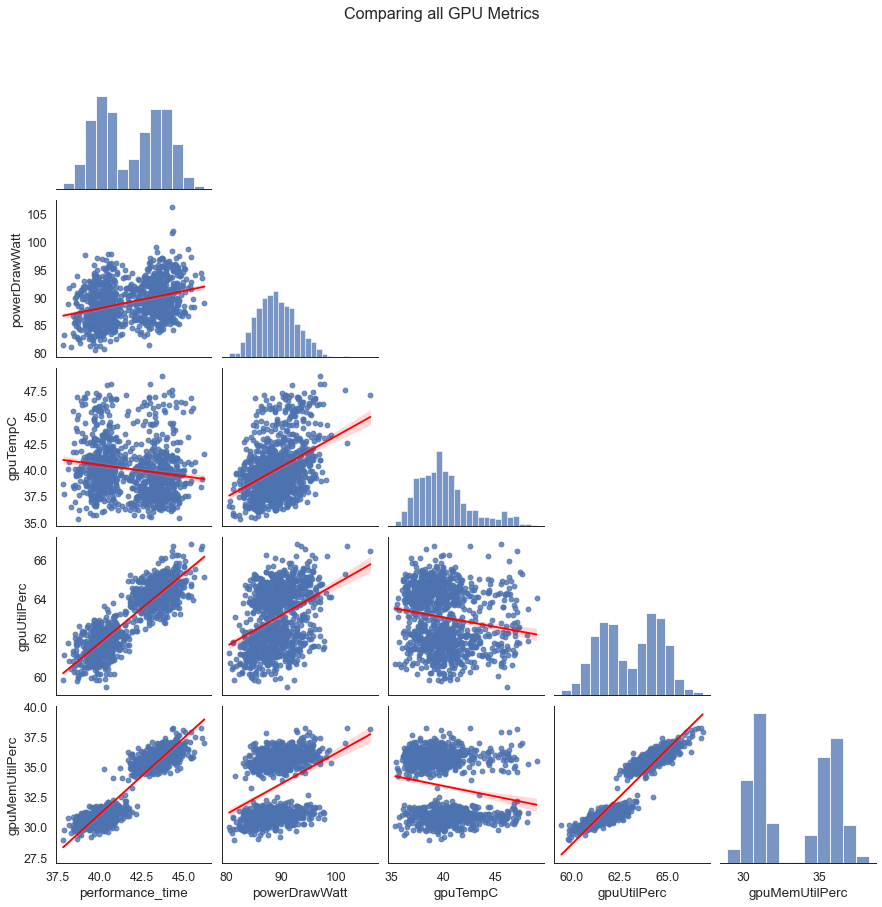

In [62]:
# Plot pairplot
g = sns.pairplot(df_total_perf, kind="reg",corner=True, plot_kws={'line_kws':{'color':'red'}})
g.fig.suptitle("Comparing all GPU Metrics", y=1.01)

A pairplot showing multiple parameters of the GPU while it is performing includin `performance_time` ia included. This is plotted using `df_total_perf`. This plot shows lot of linear relationships between multiplt parameters. Few do not have much information.

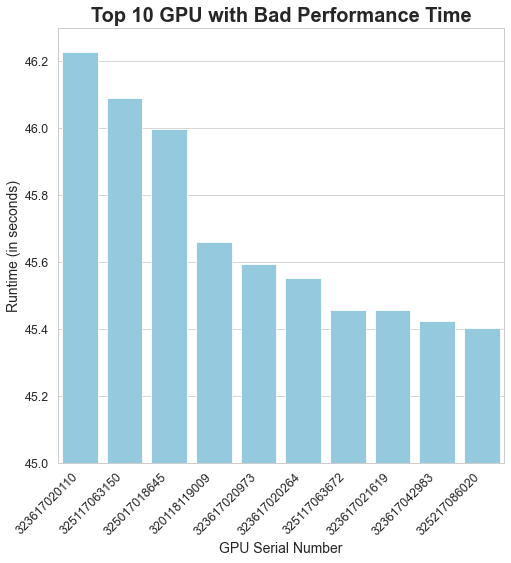

In [63]:
# Sort Values based on columns
df_total_perf.sort_values(by="performance_time", ascending=False, inplace=True)

# Plot a bar plot
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.4)
plt.subplots(figsize=(8,8))
gpu_plot_1 = sns.barplot(data=df_total_perf[["gpuSerial","performance_time"]].head(10), x="gpuSerial", y="performance_time",
                       color = 'skyblue')
gpu_plot_1.set(ylim=(45, 46.3))
gpu_plot_1.set_xticklabels(gpu_plot_1.get_xticklabels(), rotation=45, horizontalalignment='right')

# Change characteristics of the visual
plt.title("Top 10 GPU with Bad Performance Time", size=20,fontweight='bold')
plt.xlabel("GPU Serial Number", size = 14)
plt.ylabel("Runtime (in seconds)", size = 14)
plt.show()

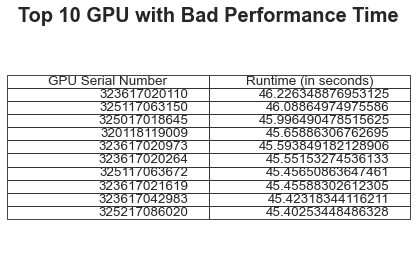

In [64]:
# Plot a table
fig, gpu_top_10_bad = plt.subplots()

fig.patch.set_visible(False)
gpu_top_10_bad.axis('off')
gpu_top_10_bad.axis('tight')

gpu_top_10_bad.table(cellText=df_total_perf[["gpuSerial","performance_time"]].head(10).values, 
                 colLabels=["GPU Serial Number","Runtime (in seconds)"], loc='center')

# Change characteristics of the visual
plt.title("Top 10 GPU with Bad Performance Time", size=20,fontweight='bold')
fig.tight_layout()
plt.show()

The above two visuals (barplot and table) show the same output, it shows the worst performing GPUs based on their `performance_time`. Both the visuals are formed using the `df_total_perf` dataframe. The dataframe was filtered within the visual code to choose only the required columns.

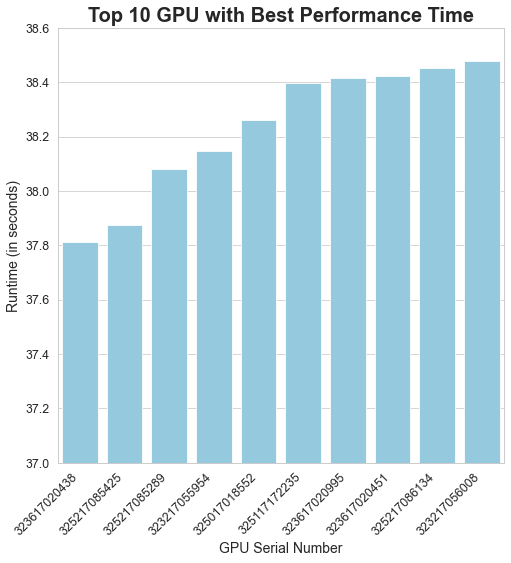

In [65]:
# Plot a barplot
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.4)
plt.subplots(figsize=(8,8))
gpu_plot_2 = sns.barplot(data=df_total_perf[["gpuSerial","performance_time"]].tail(10).sort_values(by="performance_time"), x="gpuSerial", y="performance_time",
                       color = 'skyblue')
gpu_plot_2.set(ylim=(37, 38.6))
gpu_plot_2.set_xticklabels(gpu_plot_2.get_xticklabels(), rotation=45, horizontalalignment='right')

# Change characteristics of the visual
plt.title("Top 10 GPU with Best Performance Time", size=20,fontweight='bold')
plt.xlabel("GPU Serial Number", size = 14)
plt.ylabel("Runtime (in seconds)", size = 14)
plt.show()

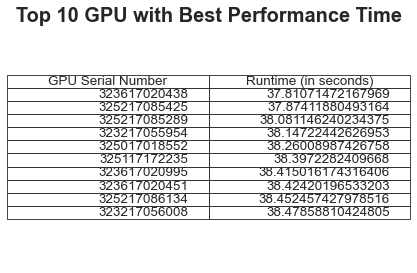

In [66]:
# Plot a table
fig, gpu_top_10_good = plt.subplots()

fig.patch.set_visible(False)
gpu_top_10_good.axis('off')
gpu_top_10_good.axis('tight')

gpu_top_10_good.table(cellText=df_total_perf[["gpuSerial","performance_time"]].tail(10).sort_values(by="performance_time").values, 
                 colLabels=["GPU Serial Number","Runtime (in seconds)"], loc='center')

# Change characteristics of the visual
plt.title("Top 10 GPU with Best Performance Time", size=20,fontweight='bold')
fig.tight_layout()
plt.show()

The above two visuals (barplot and table) show the same output, it shows the best performing GPUs based on their `performance_time`. Both the visuals are formed using the `df_total_perf` dataframe. The dataframe was filtered within the visual code to choose only the required columns.

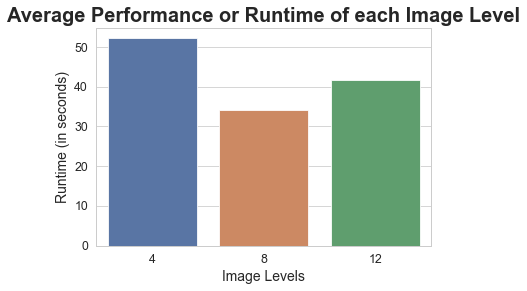

In [67]:
# Plot barplot
sns.barplot(data=df_level_perf, x="level", y="performance_time")
plt.title("Average Performance or Runtime of each Image Level", size=20,fontweight='bold')
plt.xlabel("Image Levels", size = 14)
plt.ylabel("Runtime (in seconds)", size = 14)
plt.show()

The barplot shows the different levels of the image zoom and their impact on the performance time. `df_level_perf` is used to plot this graph.

Text(0.5, 1.0, 'Heatmap based on Runtime for each co-ordinate of the Rendered Tile')

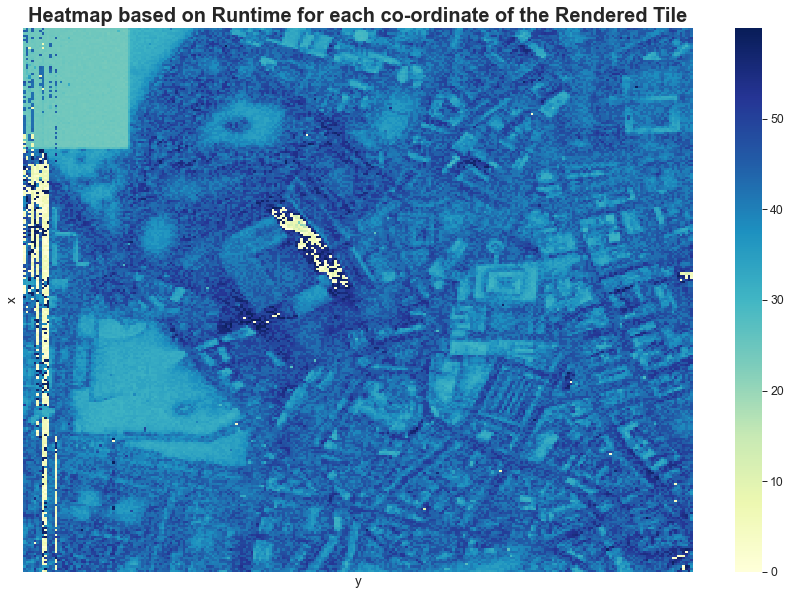

In [68]:
# Plot seaborn heatmap
sns.set(font_scale=0.8)
sns.set_context('paper', font_scale=1.4)
fig, ax = plt.subplots(figsize=(15,10))
glue = df_x_y_12[["x","y","performance_time"]].pivot("x", "y", "performance_time")
ax = sns.heatmap(glue, cmap='YlGnBu', annot=False, xticklabels=False, yticklabels=False)
ax.tick_params()

# Change characteristics of the visual
plt.title("Heatmap based on Runtime for each co-ordinate of the Rendered Tile", size=20,fontweight='bold' )

The above image displays the performance time, or runtime, required for the entire render process along each axis of the picture. It was produced by plotting the `performance_time` column on a heatmap using the respective x and y columns as position values. This plot is plotted using `df_x_y_12` dataframe.

### Conclusion

The code is added with explanation and comments for the stakeholders to understand. This way the reproducability of the output increases and the report can be better understood. The methods on how to run the jupyter notebook and how to get the dataframes uploaded will be explained in ReadME file. Therefore, this code with the main report will complete the EDA process by providing indepth analysis of the findings and the technical aspects of the process of the analysis carried out.